# Part 1: Sigmoid

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### Load Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# save file path to the data
data_path = "/content/drive/MyDrive/PHYS_495_Project_Notebooks/datasets/sigmoid_cycle/sigmoid_cycle.npy"

# load the data into a numpy array
sigmoid_pictures = np.load(data_path)

print(sigmoid_pictures.shape)

(4320, 32, 32, 3)


4320 pictures with 32x32 resolution with RGB (3 channel) color coding

### Explore Data

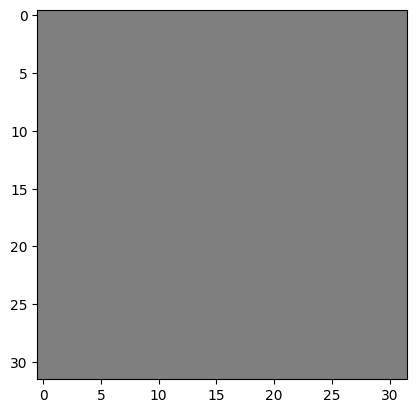

In [ ]:
plt.imshow(sigmoid_pictures[2520]) # change 0 to 1,2,3,...,4320 to find the transition image

### Prepare Labels

In [ ]:
n = 4320 # how many pictures we have (from the array.shape output before)
selected = 2520 # change this to the transition value you found previously

labels = np.array([0]*selected + [1]*(n-selected)) # we will explain this

print(labels)

[0 0 0 ... 1 1 1]


### Define Network

In [ ]:
import tensorflow as tf
def get_model():

  # defining input layer
  inputs = tf.keras.Input(shape=(32, 32, 3), name="simple_model")
  x0 = tf.keras.layers.Flatten()(inputs)

  # hidden layers 80 nodes each
  x1 = tf.keras.layers.Dense(80, activation="relu")(x0)
  x2 = tf.keras.layers.Dense(80, activation="relu")(x1)

  # single node output
  outputs = tf.keras.layers.Dense(1, name="predictions")(x2)  # linear activation!

  # create model according to defined layers
  model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f'Model')

  # some details about what type of loss function and optimization method
  model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  return model

model = get_model()
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_model (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 80)                245840    
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 predictions (Dense)         (None, 1)                 81        
                                                                 
Total params: 252401 (985.94 KB)
Trainable params: 252401 (985.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train Network

In [ ]:
# training network according to labels created from defined cutoff value
model_log = model.fit(x=sigmoid_pictures, y=labels, epochs=5)

Epoch 1/5
135/135 [==============================] - 1s 4ms/step - loss: 3.2108 - accuracy: 0.9880
Epoch 2/5
135/135 [==============================] - 1s 6ms/step - loss: 1.7941 - accuracy: 0.9956
Epoch 3/5
135/135 [==============================] - 1s 7ms/step - loss: 1.8596 - accuracy: 0.9931
Epoch 4/5
135/135 [==============================] - 1s 4ms/step - loss: 3.8040 - accuracy: 0.9926
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 2.3880 - accuracy: 0.9956


### Evaluate and Plot

In [ ]:
# evaluate on same data and same labels
performance = model.evaluate(sigmoid_pictures, labels)

print(f"Cutoff Value: {selected}")
print(f"Accuracy: {performance[1]}")

135/135 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.9956
Cutoff Value: 2520
Accuracy: 0.9956018328666687


One cutoff point is not enough. Let's loop through multiple and observe our results. Notice that each operation in the for loop is exactly the same as previously defined.

In [ ]:
results = []
cutoff_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4319]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()

  # train the model
  model_log = model.fit(x=sigmoid_pictures, y=labels, epochs=5)

  print("Evaluating")

  # evaluate performance
  performance = model.evaluate(sigmoid_pictures, labels)

  # save results
  results.append(performance[1])


*** Process Cutoff Picture 0 ***
Epoch 1/5
135/135 [==============================] - 1s 3ms/step - loss: 0.5706 - accuracy: 0.7463
Epoch 2/5
135/135 [==============================] - 1s 4ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 3/5
135/135 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/5
135/135 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Evaluating
135/135 [==============================] - 0s 2ms/step - loss: 8.1580e-04 - accuracy: 1.0000
*** Process Cutoff Picture 500 ***
Epoch 1/5
135/135 [==============================] - 1s 3ms/step - loss: 1.0908 - accuracy: 0.7012
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8843
Epoch 3/5
135/135 [==============================] - 1s 4ms/step - loss: 0.2902 - accuracy: 0.8843
Epoch 4/5
135/135 [=================

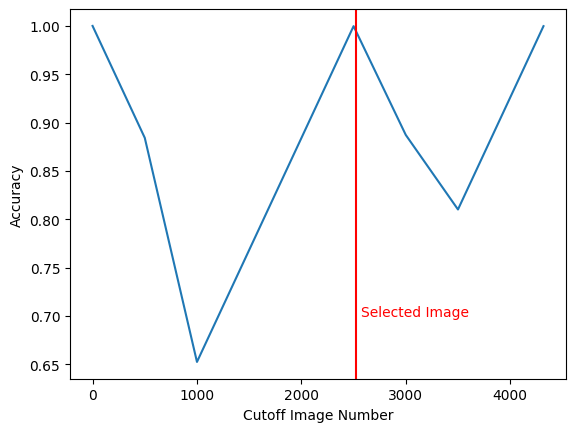

In [ ]:
plt.plot(cutoff_values, results)

plt.axvline(x=selected, color='r')
plt.text(selected+50, 0.7, 'Selected Image', color='red')

plt.xlabel('Cutoff Image Number')
plt.ylabel('Accuracy')
plt.show()

## Question: Why is there no validation set?


Answer (refine wording):
- train/val/test is to adjust hyperparameters, prevent overfitting, increase test accuracy on model
- we want confusion, data is innately confusing to our model
-

## Question:
Does the plot match what you were expecting? Why or why not?



## Explanation

The middle peak of highest accuracy at the transition point makes sense generally speaking, but what about the 100% accuracy at the ends. This comes down to probability where the cutoff value given labels every image the same way so the data itself is irrelevant. It begins to dip down because it is just guessing and from a probabilistic standpoint

### Task 1: Change the number of points on the plot

Optional Task: Determine more precisely the transition image and view it below

### Plot Average Pixel Intensity



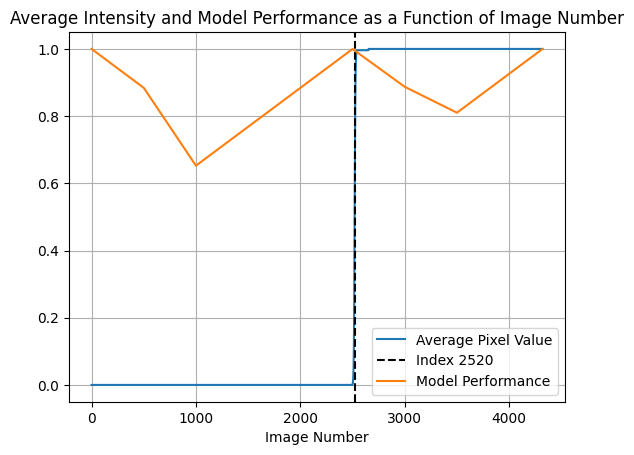

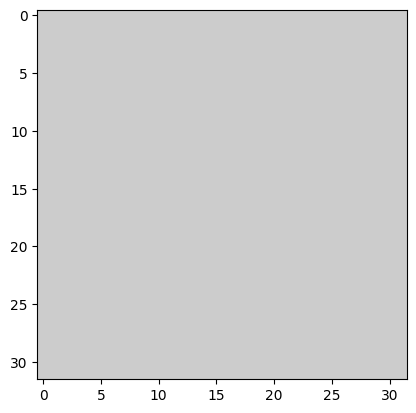

In [ ]:
average_intensity = np.mean(sigmoid_pictures, axis=(1, 2))/255
average_intensity.shape  # should be (4320, 3)

plt.plot(average_intensity[:,0], label=f'Average Pixel Value')
plt.axvline(x=selected, color='k', linestyle='--', label=f'Index {selected}')  # Add vertical line for transition image
plt.plot(cutoff_values, results, label='Model Performance')
plt.title('Average Intensity and Model Performance as a Function of Image Number')
plt.xlabel('Image Number')
plt.legend()
plt.grid(True)
plt.show()

plt.imshow(sigmoid_pictures[2525])

# Part 2: Sunrise Data

### Load Data

In [ ]:
data_path = "/content/drive/MyDrive/PHYS_495_Project_Notebooks/datasets/time_filenames/1309_time/Day1/sunrise32x32.npy"
sunrise_pictures = np.load(data_path)

print(sunrise_pictures.shape)

(4320, 32, 32, 3)


In [ ]:
# Display Full Resolution Image

from IPython.display import display
from PIL import Image

image_path = "/content/drive/MyDrive/PHYS_495_Project_Notebooks/Sample.JPG"
original_image = Image.open(image_path)
scale_factor = 0.2
new_width = int(original_image.width * scale_factor)
new_height = int(original_image.height * scale_factor)
resized_image = original_image.resize((new_width, new_height))
display(resized_image)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PHYS_495_Project_Notebooks/Sample.JPG'

![Example Image](/content/drive/MyDrive/PHYS_495_Project_Notebooks/Sample.JPG)

### Explore Data

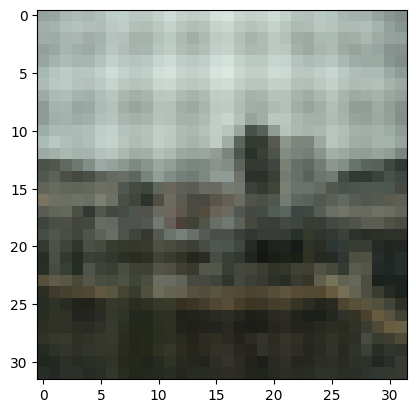

In [ ]:
plt.imshow(sunrise_pictures[2400])

### Label Data

In [ ]:
n = 4320
selected = 1620
labels = np.array([0]*selected + [1]*(n-selected))

### Get Network and Train

In [ ]:
model = get_model()
model_log = model.fit(x=sunrise_pictures, y=labels, epochs=5)

Epoch 1/5
135/135 [==============================] - 1s 3ms/step - loss: 3.3827 - accuracy: 0.9016
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.9255
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9493
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9722
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9602


### Evaluate and Plot

In [ ]:
performance = model.evaluate(sunrise_pictures, labels)
print(f"Cutoff Value: {idx}")
print(f"Accuracy: {performance[1]}")

135/135 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8748
Cutoff Value: 4319
Accuracy: 0.8747684955596924


### Question: Why is the accuracy so much higher now than before?

## Task 2: Translating Results

Translate image number to correspond to a time of day. Hint: Images in the data set are taken from midnight to 12 pm

In [ ]:
print(f"Cutoff Time: {(selected / 4320)*12}")
print(f"Accuracy: {performance[1]}")

Cutoff Time: 4.5
Accuracy: 0.8747684955596924


### Reminder of Network Definition

In [ ]:
def get_model():
  inputs = tf.keras.Input(shape=(32, 32, 3), name="simple_model")
  x0 = tf.keras.layers.Flatten()(inputs)
  x1 = tf.keras.layers.Dense(80, activation="relu")(x0)
  outputs = tf.keras.layers.Dense(1, name="predictions")(x1)  # linear activation!

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f'Model')

  model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  return model

One cutoff point is not enough. Let's loop through multiple and observe our results

In [ ]:
results = []
cutoff_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4319]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  labels = np.array([0]*idx + [1]*(n-idx))                # create new labeling

  model = get_model()                                     # load fresh model
  model_log = model.fit(x=sunrise_pictures, y=labels, epochs=1)   # train the model

  print("Evaluating")

  performance = model.evaluate(sunrise_pictures, labels)          # evaluate performance
  results.append(performance[1])                          # save results


*** Process Cutoff Picture 0 ***
135/135 [==============================] - 1s 3ms/step - loss: 0.0053 - accuracy: 0.9984
Evaluating
135/135 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
*** Process Cutoff Picture 500 ***
135/135 [==============================] - 1s 3ms/step - loss: 9.2070 - accuracy: 0.6419
Evaluating
135/135 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.5924
*** Process Cutoff Picture 1000 ***
135/135 [==============================] - 1s 3ms/step - loss: 9.7611 - accuracy: 0.7146
Evaluating
135/135 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.7051
*** Process Cutoff Picture 1500 ***
135/135 [==============================] - 1s 4ms/step - loss: 9.4480 - accuracy: 0.9090
Evaluating
135/135 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9942
*** Process Cutoff Picture 2000 ***
135/135 [==============================] - 1s 3ms/step - loss: 8

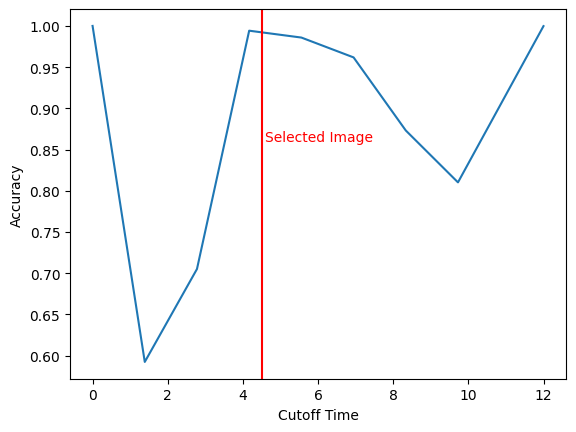

In [ ]:
plt.plot(np.array(cutoff_values) * 12 / 4320, results)

plt.axvline(x=selected * 12 / 4320, color='r')
plt.text((selected * 12 / 4320)+.1, 0.86, 'Selected Image', color='red')

plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()

### Question: We know that a single transition exists, but we are not obtaining the clean W shape we saw before. What could be the issue?

## Task 3: Improve Results
Change network definition and model.fit parameters to improve results

# Part 3: Augmentation

## Random Patching

### Import the same images with higher resolution

In [ ]:
data_path = "/content/drive/MyDrive/PHYS_495_Project_Notebooks/datasets/time_filenames/1309_time/Day1/sunrise112x112.npy"
sunrise_pictures = np.load(data_path)
print(sunrise_pictures.shape)

(4320, 112, 112, 3)


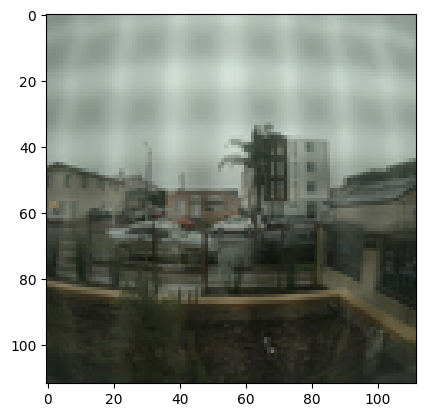

In [ ]:
# looking at same image selected before
selected_image = sunrise_pictures[2500]
plt.imshow(selected_image)

In [ ]:
# get random starting row and column from allowed values
import random
start_row = random.randint(0,112-32) # obtains an integer in range [0,79]
start_column = random.randint(0,112-32)

print((start_row, start_column))

(37, 6)


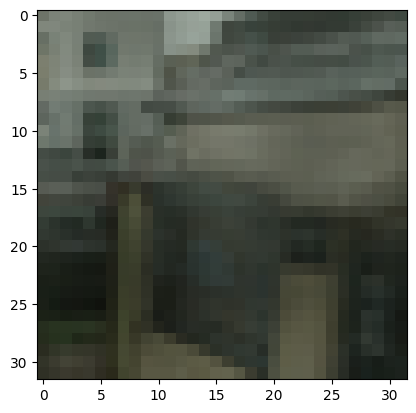

In [ ]:
# get patch from full image as subset of array
subset_array = selected_image[start_row:start_row+32, start_column:start_column+32, :]
plt.imshow(subset_array)

In [ ]:
# put in a for loop and make it a function
def get_patches(image):
  output = []

  # gets 3 patches
  for _ in range(3):

    # obtain integers in range [0,79]
    start_row = random.randint(0,112-32)
    start_column = random.randint(0,112-32)

    # get the patch as a subset of the image
    patch = image[start_row:start_row+32, start_column:start_column+32, :]

    output.append(patch)

  return output

#patches = get_patches(selected_image)

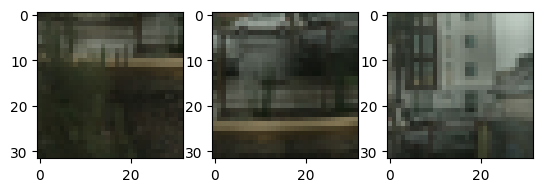

In [ ]:
# view patched images
plt.subplot(1,3,1)
plt.imshow(patches[0])

plt.subplot(1,3,2)
plt.imshow(patches[1])

plt.subplot(1,3,3)
plt.imshow(patches[2])

In [ ]:
# do random patching on all data
patched_image_list = []
for picture in sunrise_pictures:
  patches = get_patches(picture)

  patched_image_list.append(patches[0])
  patched_image_list.append(patches[1])
  patched_image_list.append(patches[2])

patched_image_data = np.array(patched_image_list)
print(patched_image_data.shape)

(12960, 32, 32, 3)


Notice how we have 3 times as much data now

In [ ]:
# train (same process as before exactly)
n = 12960
results = []
cutoff_values = [0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 12959]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()
  model_log = model.fit(x=patched_image_data, y=labels, epochs=1)

  print("Evaluating")

  performance = model.evaluate(patched_image_data, labels)          # evaluate performance
  results.append(performance[1])                          # save results


*** Process Cutoff Picture 0 ***
405/405 [==============================] - 2s 3ms/step - loss: 0.3734 - accuracy: 0.9975
Evaluating
405/405 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
*** Process Cutoff Picture 1500 ***
405/405 [==============================] - 2s 3ms/step - loss: 10.5737 - accuracy: 0.8032
Evaluating
405/405 [==============================] - 1s 2ms/step - loss: 2.4537 - accuracy: 0.7356
*** Process Cutoff Picture 3000 ***
405/405 [==============================] - 2s 4ms/step - loss: 6.9230 - accuracy: 0.7290
Evaluating
405/405 [==============================] - 1s 3ms/step - loss: 1.3468 - accuracy: 0.7218
*** Process Cutoff Picture 4500 ***
405/405 [==============================] - 2s 3ms/step - loss: 12.0613 - accuracy: 0.7429
Evaluating
405/405 [==============================] - 1s 2ms/step - loss: 2.1774 - accuracy: 0.7978
*** Process Cutoff Picture 6000 ***
405/405 [==============================] - 2s 3ms/step - loss

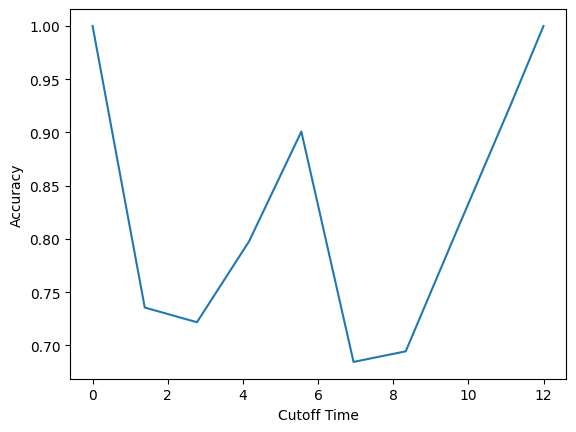

In [ ]:
plt.plot(np.array(cutoff_values) * 12 / n, results)
plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()

## Optional Task
Implement a different data augmentation method such as rotation and train the network on it

#Optional Task

we have data taken from another day in the shared folder. Reformat the data to be saved into a single numpy array that can be used to train the models with the cutoff values.

Note: The pictures have already been shrunken down to 224x224 for storage convenience, but they still need to be rescaled

Hint: The intervals between pictures are the same as the previously used data, but the start time is 12:03 am

In [ ]:
from PIL import Image
import numpy as np
import os

folder_num = 0
data_path = "/content/drive/MyDrive/datasets/sunrise/NewData"

arrays = []

count = 0

for i in range(19963, 23928):
  image_path = os.path.join(data_path, f'G00{i}.JPG')

  # Add here error handling in case there was no picture with a given name
  # e.g., G0020000.JPG is missing but you have G0019999.JPG and G0020001.JPG

  try:
    image = Image.open(image_path)
    image = image.resize((112,112))

    image_array = np.array(image)

    arrays.append(image_array)

  except:
    print(f"File {image_path} does not exist")
    count += 1

output = np.array(arrays)
np.save(os.path.join(data_path, 'sunrise112x112.npy'), output)

print()
print(f"Missing {count} images")

# Continue here

File /content/drive/MyDrive/datasets/sunrise/NewData/G0020000.JPG does not exist

Missing 1 images


In [ ]:
#augment data
sunrise_pictures = np.load(os.path.join(data_path, 'sunrise112x112.npy'))
for picture in sunrise_pictures:
  patches = get_patches(picture)

  patched_image_list.append(patches[0])
  patched_image_list.append(patches[1])
  patched_image_list.append(patches[2])

patched_image_data = np.array(patched_image_list)
print(patched_image_data.shape)

(11892, 32, 32, 3)


In [ ]:
#train
n = 11892 # must change to output shape from previous cell
results = []
cutoff_values = [0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 11892]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()
  model_log = model.fit(x=patched_image_data, y=labels, epochs=1)

  print("Evaluating")

  # evaluate the performance
  performance = model.evaluate(patched_image_data, labels)

  # save the results
  results.append(performance[1])

*** Process Cutoff Picture 0 ***
372/372 [==============================] - 2s 4ms/step - loss: 0.2246 - accuracy: 0.9973
Evaluating
372/372 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
*** Process Cutoff Picture 1500 ***
372/372 [==============================] - 2s 4ms/step - loss: 3.9388 - accuracy: 0.8051
Evaluating
372/372 [==============================] - 1s 2ms/step - loss: 1.6400 - accuracy: 0.8739
*** Process Cutoff Picture 3000 ***
372/372 [==============================] - 3s 5ms/step - loss: 6.3842 - accuracy: 0.7077
Evaluating
372/372 [==============================] - 1s 4ms/step - loss: 1.1609 - accuracy: 0.7466
*** Process Cutoff Picture 4500 ***
372/372 [==============================] - 2s 4ms/step - loss: 5.5496 - accuracy: 0.7106
Evaluating
372/372 [==============================] - 1s 2ms/step - loss: 1.0026 - accuracy: 0.7186
*** Process Cutoff Picture 6000 ***
372/372 [==============================] - 2s 4ms/step - loss: 

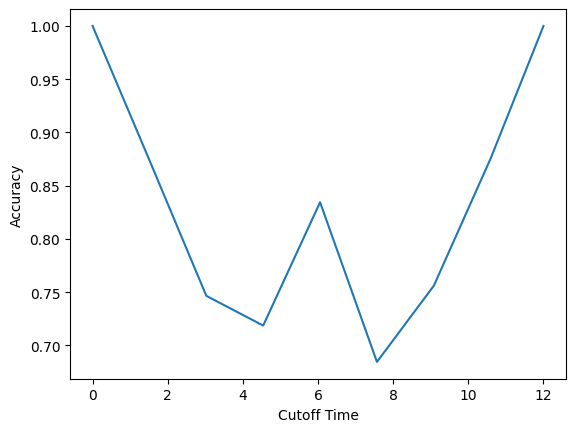

In [ ]:
plt.plot(np.array(cutoff_values) * 12 / n, results)
plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()